In [1]:
%run scripts/train.py --model wae --data_source peptide --epochs 2 --property_predictor True --type_property_predictor deep_net --train_props_path data\\function_train.txt --test_props_path data\\function_test.txt

main function called /n
train_parser function called /n
train function called /n
parser model_init called /n
WAE class init called /n
WAE class build_model called /n
wae-128_peptide


G:\Anaconda\envs\amp21\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


wae-128_peptide
44


KeyboardInterrupt: 

<module 'matplotlib.pyplot' from 'G:\\Anaconda\\envs\\amp21\\lib\\site-packages\\matplotlib\\pyplot.py'>

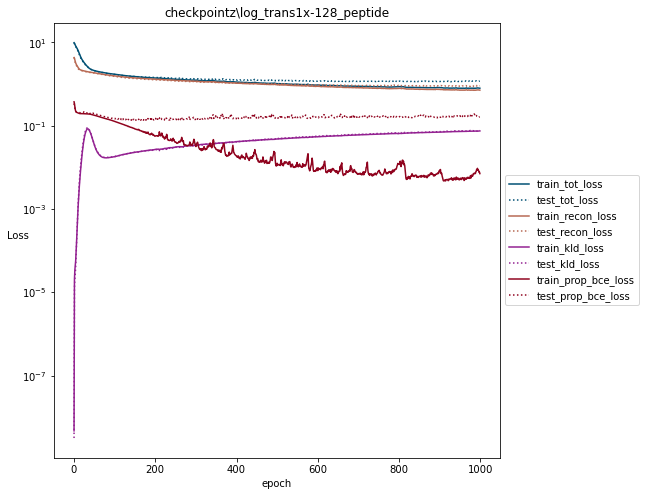

In [1]:
from transvae import analysis
#loss ploting
src = 'checkpointz\\log_trans1x-128_peptide.txt'
analysis.plot_loss_by_type(src)#, loss_type = 'kld_loss', data_type='test')

In [1]:
from scripts.train import train
from transvae import rnn_models
from transvae import trans_models
#running the model without using command line parser

class Args():
    checkpoint=None
    adam_lr=3e-4
    anneal_start=0
    batch_chunks=5
    batch_size=1000
    beta=0.05
    beta_init=1e-8
    eps_scale=1
    lr_scale=1
    warmup_steps=10000
    property_predictor=False
    save_name=None
    d_model=128
    d_latent=128
    d_property_predictor=256
    depth_property_predictor=2
    epochs=2
    save_freq=5
    model = "rnn"
    data_source = "zinc"

args = Args()
train(args)

train function called /n


AttributeError: 'Args' object has no attribute 'init_method'

In [2]:
%run scripts/attention.py --model transvae --model_ckpt checkpointz\\trans_amp\\2000_trans1x-128_peptide.ckpt --mols notebooks\\example_data\\peptides.txt --save_path "attn_weights"

attn parser function called /n
None


G:\GitHub\MSCSAM_TBD\main_model\transvae\trans_models.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.params['CHAR_WEIGHTS'] = torch.tensor(self.params['CHAR_WEIGHTS'], dtype=torch.float)


AssertionError: EGFQLMDRGTFDEIGR could not be joined

In [14]:
import pandas as pd
import numpy as np
df = pd.read_pickle("data\custom_char_dict.pkl") #the dict is just a mapping for each possible smile token to an int
weights = np.load("data\custom_char_weights.npy") 
train = pd.read_csv('data\zinc_train.txt').to_numpy()
from transvae import tvae_util

In [5]:
print("with start and end: ",df)
df = {i:df[i] for i in df if i!='<end>'}
df = {i:df[i] for i in df if i!='<start>'}
print("withOUT start and end: ",df)

parameters_class = {"NUM_CHAR" : 24,  "CHAR_DICT" : df, "MAX_LENGTH" : 126 } 
params = parameters_class

smiles = []
for smile in train:
    smiles.append(tvae_util.smi_tokenizer(smile[0]))
print(smiles[0])

#char_weights = tvae_util.get_char_weights(smiles,params)
#print(char_weights)

with start and end:  {'C': 1, 'c': 2, '1': 3, '(': 4, ')': 5, 'N': 6, '=': 7, 'S': 8, '2': 9, 'O': 10, '3': 11, 'F': 12, 'n': 13, 's': 14, '-': 15, 'Cl': 16, '4': 17, '5': 18, '6': 19, 'Br': 20, '[nH]': 21, '#': 22, 'o': 23, '_': 24}
withOUT start and end:  {'C': 1, 'c': 2, '1': 3, '(': 4, ')': 5, 'N': 6, '=': 7, 'S': 8, '2': 9, 'O': 10, '3': 11, 'F': 12, 'n': 13, 's': 14, '-': 15, 'Cl': 16, '4': 17, '5': 18, '6': 19, 'Br': 20, '[nH]': 21, '#': 22, 'o': 23, '_': 24}
['C', 'C', 'C', 'S', '(', '=', 'O', ')', 'c', '1', 'c', 'c', 'c', '2', '[nH]', 'c', '(', '=', 'N', 'C', '(', '=', 'O', ')', 'O', 'C', ')', '[nH]', 'c', '2', 'c', '1']


In [2]:
%run scripts/build_vocab.py --inputs data\peptides\peptide_train.txt --max_len 100

building dictionary...
calculating weights...
{'A': 73731, 'L': 100803, 'V': 63964, 'S': 64110, 'Q': 32804, 'C': 70722, 'R': 81996, 'P': 48134, 'T': 46567, 'E': 53248, 'K': 101575, 'I': 59910, 'H': 22858, 'W': 25700, 'D': 39623, 'G': 84737, 'M': 20750, 'F': 47778, 'Y': 28685, 'N': 43013, '_': 2914692, '<end>': 40254}


In [2]:
weights = np.load("data\custom_char_weights.npy")
weights

array([0.66075633, 0.6018436 , 0.61068701, 0.60286361, 0.73658086,
       0.59539247, 0.65802035, 0.61671083, 0.61097385, 0.6184843 ,
       0.65109993, 0.64359417, 0.60415347, 0.64448577, 0.62691629,
       0.65689944, 0.63483703, 0.62951292, 0.70116584, 0.66961309,
       0.89228125, 1.        , 1.        , 1.        , 0.1       ,
       0.6573441 ])